In [2]:
# Necessary imports for first part

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('https://query.data.world/s/gk5b2kr5mdo35m3puyxljesn7dbf4v?dws=00000')

# Could you provide an answer for the following questions:

 Which brewery produces the strongest beers by abv ?

 If you had to pick 3 beers to recommend to someone, how would you approach the problem ?

 What are the factors that impacts the quality of beer the most ?

 I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?

 

# Loading and checking the data

In [26]:
df.head(5)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [5]:
# Checking shape of Dataframe

df.shape

(1586614, 13)

In [7]:
# Checking duplicated rows

df[df.duplicated() == True].count()

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

In [8]:
# Checking overall information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [9]:
# Checking for missing values

df.isna().any()

brewery_id            False
brewery_name           True
review_time           False
review_overall        False
review_aroma          False
review_appearance     False
review_profilename     True
beer_style            False
review_palate         False
review_taste          False
beer_name             False
beer_abv               True
beer_beerid           False
dtype: bool

In [10]:
df_nan = df[df['brewery_name'].isnull()]
df_nan

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
651565,1193,NaN,1301022066,2.0,2.5,2.5,Knapp85,Vienna Lager,1.5,1.5,Engel Tyrolian Bräu WRONG BREWERY SEE SCHWABIS...,5.0,67503
659293,1193,NaN,1290107698,4.0,4.5,3.5,dqrull,Bock,4.0,3.5,Engel Bock Dunkel WRONG BREWERY SEE CRAILSHEIMER,7.2,63658
659299,1193,NaN,1289077001,3.5,3.0,3.0,dqrull,Dortmunder / Export Lager,4.0,4.0,Engel Gold WRONG BREWERY SEE CRAILSHEIMER,5.4,63215
659300,1193,NaN,1289851033,3.5,4.0,3.5,dqrull,Munich Helles Lager,3.5,3.0,Engel Landbier WRONG BREWERY SEE CRAILSHEIMER,4.8,63557
659301,1193,NaN,1289158632,3.5,4.0,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,3.5,Engel Keller Hell WRONG BREWERY SEE CRAILSHEIMER,5.4,63256
659302,1193,NaN,1289590065,3.5,4.0,3.0,dqrull,Vienna Lager,3.0,3.5,Engel Aloisius - WRONG BREWERY SEE CRAILSHEIMER,5.9,63459
659303,1193,NaN,1298078926,3.0,3.0,3.0,Ochsenblut,Keller Bier / Zwickel Bier,2.0,3.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659304,1193,NaN,1292423271,4.5,4.0,4.0,Dentist666,Keller Bier / Zwickel Bier,4.0,4.5,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659305,1193,NaN,1289329962,3.5,3.5,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,4.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
1391043,27,NaN,1020244856,3.5,3.5,3.5,Jason,American Adjunct Lager,4.0,3.5,Hard Hat American Beer,3.8,60


In [11]:
null_rows = df.loc[df['brewery_name'].isnull() | df['review_profilename'].isnull() | df['beer_abv'].isnull()]
null_rows

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
273,1075,Caldera Brewing Company,1103668195,3.0,3.0,3.0,RedDiamond,American Stout,4.0,3.0,Cauldron Espresso Stout,NaN,21241
430,850,Moon River Brewing Company,1110736110,3.5,4.0,4.5,cMonkey,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
603,850,Moon River Brewing Company,1100038819,4.0,3.5,4.0,aracauna,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
733,1075,Caldera Brewing Company,1260673921,4.0,4.0,4.0,plaid75,American IPA,4.0,4.0,Alpha Beta,NaN,54723
798,1075,Caldera Brewing Company,1212201268,4.5,4.5,4.0,grumpy,American Double / Imperial Stout,4.0,4.5,Imperial Stout,NaN,42964
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586568,14359,The Defiant Brewing Company,1187052567,4.0,3.5,4.0,maddogruss,Bock,4.0,4.0,Bock,NaN,36424
1586587,14359,The Defiant Brewing Company,1177842168,3.5,4.5,4.0,BBM,Maibock / Helles Bock,4.5,4.0,Maibock,NaN,36555
1586596,14359,The Defiant Brewing Company,1287951067,4.0,3.0,5.0,hoppymcgee,Belgian Strong Pale Ale,4.0,3.5,Resolution #2,NaN,48360
1586597,14359,The Defiant Brewing Company,1241906223,4.5,4.5,4.0,WesWes,Belgian Strong Pale Ale,4.0,4.0,Resolution #2,NaN,48360


Despite the NaN values present in the rows in the brewery_name, review_profilename, and beer_abv columns, I decided not to remove these rows because they will not negatively impact further analysis to answer the questions.

In [12]:
# Check the description of the data set, what are maximum, minimum, mean, standard deviation value, total count
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [290]:
# Number of unique beer styles and beer names
unq_beer_styles = df['beer_style'].unique()
unq_beer_names = df['beer_name'].unique()

unq_beer_styles[0:].size, unq_beer_names[0:].size

(104, 56857)

## Question: Which brewery produces the strongest beers by abv ?

In [13]:
df.head(5)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [180]:
# Creating a Dataframe containing a unique brewery name, beer names, and ABV value

df_1 = df[['brewery_name', 'beer_name', 'beer_abv']]
df_1 = df_1.drop_duplicates().reset_index(drop=True)

df_1

,brewery_name,beer_name,beer_abv
0,Vecchio Birraio,Sausa Weizen,5.0
1,Vecchio Birraio,Red Moon,6.2
2,Vecchio Birraio,Black Horse Black Beer,6.5
3,Vecchio Birraio,Sausa Pils,5.0
4,Caldera Brewing Company,Cauldron DIPA,7.7
...,...,...,...
65829,The Defiant Brewing Company,Highland Porter,6.0
65830,The Defiant Brewing Company,Baron Von Weizen,5.0
65831,The Defiant Brewing Company,Resolution #2,NaN
65832,The Defiant Brewing Company,Double IPA,9.0


In [181]:
# Calculating the average ABV content of beer for all beers within a brewery

df_1 = df_1.groupby(['brewery_name'])['brewery_name', 'beer_abv'].mean().sort_values(by=['beer_abv'], ascending=False)
df_1 = df_1.rename(columns= {'beer_abv':'avg_beer_abv'})

df_1.head(10)

,avg_beer_abv
brewery_name,
Schorschbräu,24.690000
Shoes Brewery,15.200000
Rome Brewing Company,14.200000
Hurlimann Brewery,13.500000
Alt-Oberurseler Brauhaus,13.200000
Rascal Creek Brewing Co.,13.000000
Monks Porter House,12.466667
United Brands Company,12.000000
Morgan Street Brewery,12.000000


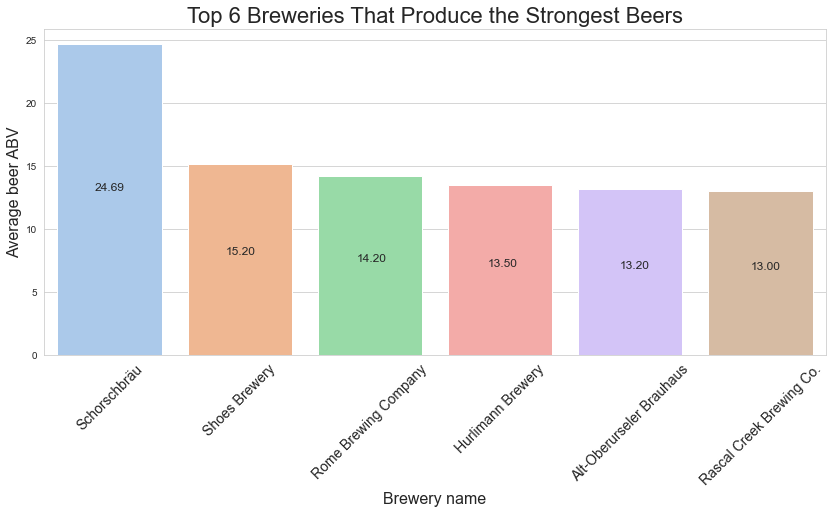

In [226]:
# Creating a bar plot with Seaborn
plt.figure(figsize=(14,6))
ax = sns.barplot(x='brewery_name', y='avg_beer_abv', data=df_1.head(6).reset_index(), palette='pastel')

# Adding a title and axis label
plt.title('Top 6 Breweries That Produce the Strongest Beers', fontsize=22)
plt.xlabel('Brewery name', fontsize=16)
plt.ylabel('Average beer ABV', fontsize=16)

# Adding values in the middle of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                ha='center', va='center', textcoords='offset points', fontsize=12)

# Changing font size and rotation of x-axis markers
plt.xticks(fontsize=14, rotation=45)

# Show final chart
plt.show()

In [183]:
#Top brewery producing the strongest beers on average

df_1.head(1)

,avg_beer_abv
brewery_name,
Schorschbräu,24.69


Which brewery produces the strongest beers by abv ?

### **Answer: Schorschbräu is the brewery which on average produces the strongest beers by ABV.**

## Question: you had to pick 3 beers to recommend to someone, how would you approach the problem ?


In [230]:
df_2 = df.groupby('beer_name').agg(
    review_count=('review_overall', 'count'),  # count of overall review
    review_mean=('review_overall', 'mean')).reset_index()  # average overall review


# Initializing scalers
scaler = MinMaxScaler()

# Normalization of review_count and review_mean columns
df_2[['review_count_norm', 'review_mean_norm']] = scaler.fit_transform(df_2[['review_count', 'review_mean']])

# We can now calculate the "total_score" as the average of these two normalized columns
df_2['total_score'] = (df_2['review_count_norm'] + df_2['review_mean_norm']) / 2

# Sorting by total score
df_2 = df_2.sort_values(by='total_score', ascending=False).reset_index(drop=True)

df_2.head(5)

,beer_name,review_count,review_mean,review_count_norm,review_mean_norm,total_score
0,90 Minute IPA,3290,4.145745,1.000000,0.786436,0.893218
1,Old Rasputin Russian Imperial Stout,3111,4.174221,0.945576,0.793555,0.869566
2,Sierra Nevada Celebration Ale,3000,4.168667,0.911827,0.792167,0.851997
3,Pliny The Elder,2527,4.590028,0.768015,0.897507,0.832761
4,India Pale Ale,3130,3.842812,0.951353,0.710703,0.831028


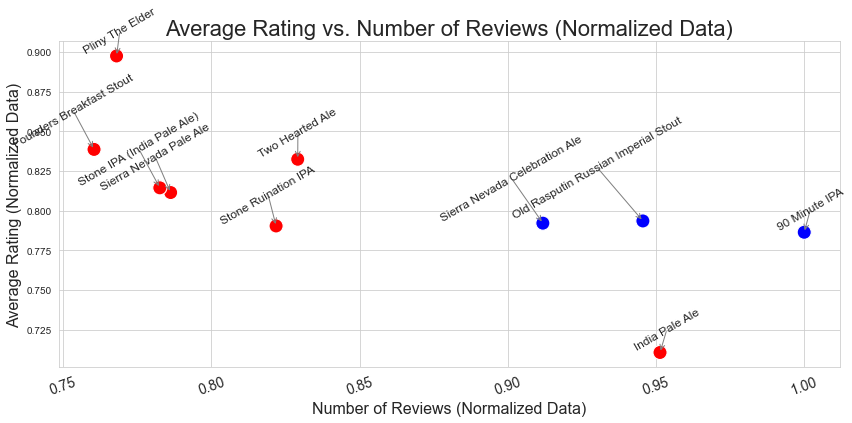

In [231]:
# Creating a scatter plot with Seaborn
df_2_plot = df_2.head(10)
plt.figure(figsize=(14,6))

# Dot colors - first three in blue, the rest in red
df_2_plot['color'] = ['red' if i < 3 else 'blue' for i in range(len(df_2_plot))]

ax = sns.scatterplot(x='review_count_norm', 
                     y='review_mean_norm', 
                     data=df_2_plot, s=200, 
                     hue='color', 
                     palette={'red', 'blue'}, 
                     legend=False)


# Adding beer name labels to dots, with 30 degree rotation and arrows
for i in range(len(df_2_plot)):
    # Point position (x, y)
    x = df_2_plot['review_count_norm'][i]
    y = df_2_plot['review_mean_norm'][i]
    
    # Shifted text position
    text_x = x + 40 # Move label to the right
    text_y = y - 0.5  # Move label down
    
    # Adding text with offset and arrow
    ax.annotate(df_2_plot['beer_name'][i],
                (x, y),  # Starting point
                (text_x, text_y),  # Text position
                textcoords="offset points",  # Offset
                fontsize=12, ha='right', va='bottom', 
                rotation=30,
                arrowprops=dict(arrowstyle="->", color='gray'))  # Arrow
    
    

# Adding a title and axis label
plt.title('Average Rating vs. Number of Reviews (Normalized Data)', fontsize=22)
plt.xlabel('Number of Reviews (Normalized Data)', fontsize=16)
plt.ylabel('Average Rating (Normalized Data)', fontsize=16)

# Changing font size and rotation of x-axis markers
plt.xticks(fontsize=14, rotation=20)

# Show final chart
plt.show()

In [232]:
# Top 3 recommended beer names

df_2.head(3)

,beer_name,review_count,review_mean,review_count_norm,review_mean_norm,total_score
0,90 Minute IPA,3290,4.145745,1.000000,0.786436,0.893218
1,Old Rasputin Russian Imperial Stout,3111,4.174221,0.945576,0.793555,0.869566
2,Sierra Nevada Celebration Ale,3000,4.168667,0.911827,0.792167,0.851997


If you had to pick 3 beers to recommend to someone, how would you approach the problem ?

### Answer: If I had to recommend 3 beers to someone of all avaliable in the dataset I would consider number of reviews and average review score. In this case I would recommend to try "90 Minute IPA", "Old Rasputin Russian Imperial Stout", "Sierra Nevada Celebration Ale",  due to significant number of reviews (over 3k) and overall score above 4. With possibility of additional questions, such as prefered beer style, we can propose even more accurate beer recomendadtion.

## Question: What are the factors that impacts the quality of beer the most ?

In [19]:
# Creating correlation matrix

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
brewery_id,1.00,0.22,-0.01,0.02,0.00,-0.00,-0.00,0.06,0.42
review_time,0.22,1.00,0.03,0.07,0.06,0.06,0.04,0.14,0.46
review_overall,-0.01,0.03,1.00,0.62,0.50,0.70,0.79,0.14,0.00
review_aroma,0.02,0.07,0.62,1.00,0.56,0.62,0.72,0.33,0.08
review_appearance,0.00,0.06,0.50,0.56,1.00,0.57,0.55,0.26,0.05
review_palate,-0.00,0.06,0.70,0.62,0.57,1.00,0.73,0.29,0.04
review_taste,-0.00,0.04,0.79,0.72,0.55,0.73,1.00,0.29,0.03
beer_abv,0.06,0.14,0.14,0.33,0.26,0.29,0.29,1.00,0.20
beer_beerid,0.42,0.46,0.00,0.08,0.05,0.04,0.03,0.20,1.00


What are the factors that impacts the quality of beer the most ?

### Answer: Considering review_overall as a parameter of beer quality, we can conclude that the factors that have the greatest influence are (from highest correlation to lowest):

**- taste (0.79);**

**- palate (0.70);**

**- aroma (0.62);**

**- appearance (0.50).**

## Question: I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?

In [255]:
# Creating a separate Dataframe with the calculation of average aroma and appearance by beer style

df_4_beer_styles = df.groupby(['beer_style'])['review_aroma', 'review_appearance'].mean() \
                .sort_values(by=['review_aroma'], ascending=False).round(2)

df_4_beer_styles.head(5)

,review_aroma,review_appearance
beer_style,,
American Double / Imperial Stout,4.16,4.16
Eisbock,4.16,3.96
Quadrupel (Quad),4.13,4.12
American Wild Ale,4.13,4.01
Lambic - Unblended,4.12,3.91


In [256]:
# Creating a separate Dataframe with the calculation of average aroma and appearance by beer name

df_4_beer_names = df[['beer_name', 'beer_style', 'review_aroma', 'review_appearance']]

df_4_beer_names = df_4_beer_names.groupby(
                    [ 'beer_style', 'beer_name']) \
                    ['beer_style', 'review_aroma', 'review_appearance']\
                    .mean().round(2).reset_index()

df_4_beer_names.head(5)

,beer_style,beer_name,review_aroma,review_appearance
0,Altbier,"""Alt""ered State",3.75,4.00
1,Altbier,"""Nein Toll Bier"" German Alt",4.00,3.50
2,Altbier,'Sconnie Rustic Trail Amber,3.25,3.00
3,Altbier,(512) Alt,3.82,3.77
4,Altbier,2010 Cleveland Beer Week Collaboration Altbier...,3.20,3.10


In [257]:
# Merging both created Dataframes to match the average appearance and aroma of a given beer style to a specific beer name

df_4_merged = pd.merge(df_4_beer_names, df_4_beer_styles, on='beer_style', how='inner', suffixes=('_names', '_styles'))

df_4_merged.head(5)

,beer_style,beer_name,review_aroma_names,review_appearance_names,review_aroma_styles,review_appearance_styles
0,Altbier,"""Alt""ered State",3.75,4.00,3.62,3.81
1,Altbier,"""Nein Toll Bier"" German Alt",4.00,3.50,3.62,3.81
2,Altbier,'Sconnie Rustic Trail Amber,3.25,3.00,3.62,3.81
3,Altbier,(512) Alt,3.82,3.77,3.62,3.81
4,Altbier,2010 Cleveland Beer Week Collaboration Altbier...,3.20,3.10,3.62,3.81


In [258]:
# Checking the differences between average aromas and appearances

df_4_merged['aroma_diff'] = df_4_merged['review_aroma_names'] - df_4_merged['review_aroma_styles']
df_4_merged['appearance_diff'] = df_4_merged['review_appearance_names'] - df_4_merged['review_appearance_styles']

df_4_merged.head(5)

,beer_style,beer_name,review_aroma_names,review_appearance_names,review_aroma_styles,review_appearance_styles,aroma_diff,appearance_diff
0,Altbier,"""Alt""ered State",3.75,4.00,3.62,3.81,0.13,0.19
1,Altbier,"""Nein Toll Bier"" German Alt",4.00,3.50,3.62,3.81,0.38,-0.31
2,Altbier,'Sconnie Rustic Trail Amber,3.25,3.00,3.62,3.81,-0.37,-0.81
3,Altbier,(512) Alt,3.82,3.77,3.62,3.81,0.20,-0.04
4,Altbier,2010 Cleveland Beer Week Collaboration Altbier...,3.20,3.10,3.62,3.81,-0.42,-0.71


In [263]:
# Calculate the absolute sum of values in columns 'aroma_diff' and 'appearance_diff'
df_4_merged['abs_diff_sum'] = df_4_merged['aroma_diff'].abs() + df_4_merged['appearance_diff'].abs()

# Group data by beer style and select the beer name with the smallest absolute total difference
df_4_final = df_4_merged.loc[df_4_merged.groupby('beer_style')['abs_diff_sum'].idxmin()]

# Removing 'abs_diff_sum'
df_4_final = df_4_final.drop(columns=['abs_diff_sum']).reset_index(drop=True)

# Displaying the result
df_4_final

,beer_style,beer_name,review_aroma_names,review_appearance_names,review_aroma_styles,review_appearance_styles,aroma_diff,appearance_diff
0,Altbier,Schmaltz's Alt,3.62,3.80,3.62,3.81,0.00,-0.01
1,American Adjunct Lager,Rainier Lager,2.48,2.82,2.48,2.79,0.00,0.03
2,American Amber / Red Ale,Ausable Wulff Red Ale,3.62,3.81,3.63,3.81,-0.01,0.00
3,American Amber / Red Lager,J.R. Brickman Honey Red,3.21,3.54,3.21,3.53,0.00,0.01
4,American Barleywine,Lunar Shine Burley Whine,4.03,4.03,4.02,4.04,0.01,-0.01
...,...,...,...,...,...,...,...,...
99,Vienna Lager,Shiner 98 Bavarian Style Amber,3.40,3.70,3.43,3.70,-0.03,0.00
100,Weizenbock,Hacker-Pschorr Weisse Bock,4.05,4.00,4.04,4.01,0.01,-0.01
101,Wheatwine,Portsmouth Wheat Wine,3.97,3.89,3.97,3.91,0.00,-0.02
102,Winter Warmer,Nutcracker Ale,3.71,3.83,3.71,3.84,0.00,-0.01


I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?

### Answer: I recommend above 7 beers because their arome and appearance is in line with beer style average.